In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [2]:
tf.__version__

'2.15.0'

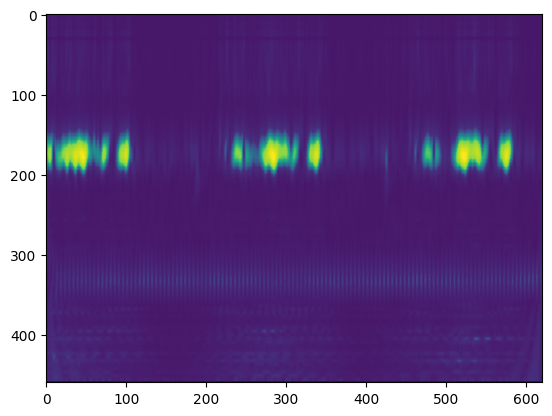

In [3]:

file_path = 'PureCWTImage/CWTimg0_2inch_c.png'

# Load the image
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

In [4]:
img.shape

(460, 620)

In [5]:
from collections import Counter
import os
import cv2

pic = []
label = []

c_cnt=0
i_cnt=0
s_cnt=0
u_cnt=0

for file_name in os.listdir('PureCWTImage'):
    current_label = file_name.split('_')[2].split('.')[0]
    if current_label == 'c' and (c_cnt<300):
        c_cnt+=1
        img=cv2.imread('PureCWTImage/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(0)
    elif current_label == 'i'and (i_cnt<200):
        i_cnt+=1
        img=cv2.imread('PureCWTImage/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(1)
    elif current_label == 's'and (s_cnt<300):
        s_cnt+=1
        img=cv2.imread('PureCWTImage/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(2)
    elif current_label == 'u'and (u_cnt<200):
        u_cnt+=1
        img=cv2.imread('PureCWTImage/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(3)
    if(c_cnt==300 and i_cnt==200 and s_cnt==300 and u_cnt==200):
        break

    

In [6]:
label.count(0), label.count(1), label.count(2), label.count(3)

(300, 200, 300, 200)

In [7]:
# shuffle the data
pic = np.array(pic)
label = np.array(label)
idx = np.random.permutation(len(pic))
pic, label = pic[idx], label[idx]
# split the data
pic = pic / 255.0

from sklearn.model_selection import train_test_split

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pic, label, test_size=0.2, random_state=42)

# Split train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)




In [8]:
x_train[3]

array([[0.        , 0.05882353, 0.0627451 , ..., 0.05490196, 0.05490196,
        0.05490196],
       [0.        , 0.05882353, 0.0627451 , ..., 0.05882353, 0.05882353,
        0.05490196],
       [0.        , 0.05882353, 0.0627451 , ..., 0.05882353, 0.05882353,
        0.05490196],
       ...,
       [0.        , 0.09411765, 0.20784314, ..., 0.61960784, 0.42745098,
        0.21176471],
       [0.        , 0.08627451, 0.19215686, ..., 0.58431373, 0.40392157,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
type(y_train[3])

numpy.int32

In [10]:
type(x_train[3])

numpy.ndarray

In [11]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(460, 620, 1)),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(16, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Conv2D(8, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [12]:
# Compile the model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history1 = model.fit(x_train, y_train, epochs=50, batch_size=32 , validation_data=(x_val, y_val))

Epoch 1/50


20/20 [==============================] - 21s 943ms/step - loss: 1.4343 - accuracy: 0.3094 - val_loss: 1.3576 - val_accuracy: 0.2937
Epoch 2/50
20/20 [==============================] - 15s 772ms/step - loss: 1.3704 - accuracy: 0.2859 - val_loss: 1.3470 - val_accuracy: 0.2937
Epoch 3/50
20/20 [==============================] - 15s 733ms/step - loss: 1.3699 - accuracy: 0.2937 - val_loss: 1.3486 - val_accuracy: 0.2937
Epoch 4/50
20/20 [==============================] - 15s 735ms/step - loss: 1.3693 - accuracy: 0.2859 - val_loss: 1.3472 - val_accuracy: 0.2937
Epoch 5/50
20/20 [==============================] - 14s 728ms/step - loss: 1.3690 - accuracy: 0.3031 - val_loss: 1.3466 - val_accuracy: 0.2937
Epoch 6/50
20/20 [==============================] - 14s 720ms/step - loss: 1.3713 - accuracy: 0.2906 - val_loss: 1.3487 - val_accuracy: 0.2937
Epoch 7/50
20/20 [==============================] - 15s 736ms/step - loss: 1.3701 - accuracy: 0.2828 - val_loss: 1.3491 - val_accuracy: 0.29

In [14]:
new_learning_rate = 0.001
model.optimizer.learning_rate = new_learning_rate

# 第二阶段训练
history2 = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 将两个阶段的训练历史记录合并
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']

Epoch 1/30
20/20 [==============================] - 15s 755ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3479 - val_accuracy: 0.2937
Epoch 2/30
20/20 [==============================] - 15s 732ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3477 - val_accuracy: 0.2937
Epoch 3/30
20/20 [==============================] - 14s 718ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3475 - val_accuracy: 0.2937
Epoch 4/30
20/20 [==============================] - 14s 725ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3473 - val_accuracy: 0.2937
Epoch 5/30
20/20 [==============================] - 14s 719ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3474 - val_accuracy: 0.2937
Epoch 6/30
20/20 [==============================] - 14s 715ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3472 - val_accuracy: 0.2937
Epoch 7/30
20/20 [==============================] - 14s 715ms/step - loss: 1.3685 - accuracy: 0.3016 - val_loss: 1.3474 - val_accuracy: 0.2937

In [15]:
# Evaluate the model
model.evaluate(x_test, y_test)


7/7 [==============================] - 2s 187ms/step - loss: 1.3788 - accuracy: 0.3000


[1.3787682056427002, 0.30000001192092896]

In [16]:


# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


AttributeError: 'dict' object has no attribute 'history'